## Demonstrating Perceptron Capabilities

This section showcases the ability of perceptrons to fit linear logic functions, classifying data points into binary classes.

### References
- McCulloch, W.S., & Pitts, W. (1943). *A logical calculus of the ideas immanent in nervous activity.* Bulletin of Mathematical Biophysics, 5, 115–133. [https://doi.org/10.1007/BF02478259](https://doi.org/10.1007/BF02478259)
- Lotfi, Ehsan, Akbarzadeh-T, M.-R., A Novel Single Neuron Perceptron with Universal Approximation and XOR Computation Properties, Computational Intelligence and Neuroscience, 2014, 746376, 6 pages, 2014. https://doi.org/10.1155/2014/746376

In [1]:
import typing

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron

range_xy = [(x, y) for x in range(2) for y in range(2)]


def plot_example(f: typing.Callable[[int, int], int], padding: float = 0.25):
    data_points = [(x, y, f(x, y)) for x, y in range_xy]
    # Plot data points
    plt.figure(figsize=(2 + 2 * padding, 2 + 2 * padding))
    plt.scatter(*zip(*[(x, y) for x, y, output in data_points if output == 1]), marker='x')
    plt.scatter(*zip(*[(x, y) for x, y, output in data_points if output == 0]), marker='o')
    plt.xlim(-padding, 1 + padding)
    plt.ylim(-padding, 1 + padding)
    # Plot decision boundary
    X = np.array([[x, y] for x, y in range_xy])
    y = [output for x, y, output in data_points]
    model = Perceptron(random_state=42)
    model.fit(X, y)
    slope = -model.coef_[0][0] / model.coef_[0][1]
    intercept = -model.intercept_[0] / model.coef_[0][1]
    x_vals = [-padding, 1 + padding]
    y_vals = [slope * x + intercept for x in x_vals]
    plt.plot(x_vals, y_vals, color='black', label='Decision Boundary')
    # Use the perceptron to predict classes
    for x, prediction in zip(X, model.predict(X)):
        print(f"x={x} -> predicted class = {prediction}")
    plt.show()

## Logic Functions in the Perceptron Model and Linear Separable Problems

The behavior of the Perceptron model is demonstrated using the following **logic functions**:

- **NOT**
- **OR**
- **AND**

Additionally, combinations such as **NOR** (NOT OR) and **NAND** (NOT AND) are showcased to emphasize that these derived logic functions belong to the same family.

x=[0 0] -> predicted class = 1
x=[0 1] -> predicted class = 1
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 0


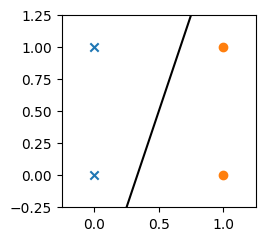

x=[0 0] -> predicted class = 1
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 1
x=[1 1] -> predicted class = 0


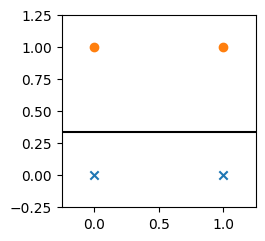

In [2]:
plot_example(lambda x, y: int(not x))
plot_example(lambda x, y: int(not y))

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 1


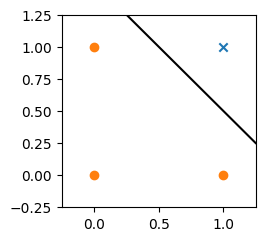

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 1
x=[1 1] -> predicted class = 0


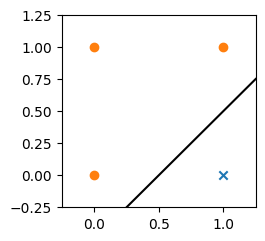

x=[0 0] -> predicted class = 1
x=[0 1] -> predicted class = 1
x=[1 0] -> predicted class = 1
x=[1 1] -> predicted class = 0


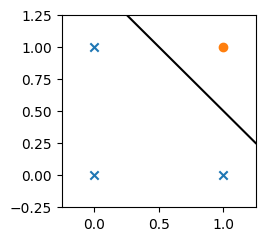

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 1
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 0


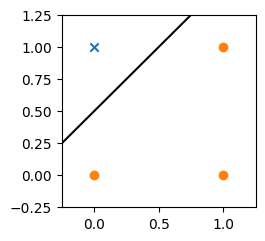

In [3]:
plot_example(lambda x, y: int(x and y))
plot_example(lambda x, y: int(x and (not y)))
plot_example(lambda x, y: int(not (x and y)))
plot_example(lambda x, y: int((not x) and y))

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 1
x=[1 0] -> predicted class = 1
x=[1 1] -> predicted class = 1


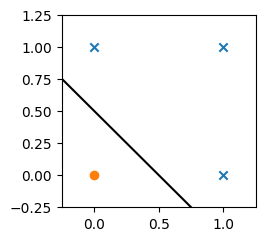

x=[0 0] -> predicted class = 1
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 1
x=[1 1] -> predicted class = 1


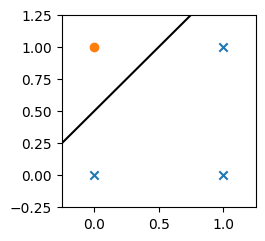

x=[0 0] -> predicted class = 1
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 0


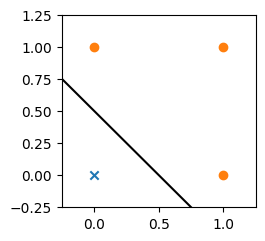

x=[0 0] -> predicted class = 1
x=[0 1] -> predicted class = 1
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 1


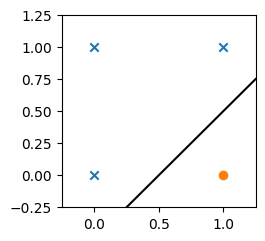

In [4]:
plot_example(lambda x, y: int(x or y))
plot_example(lambda x, y: int(x or (not y)))
plot_example(lambda x, y: int(not (x or y)))
plot_example(lambda x, y: int((not x) or y))

## XOR Problem and Perceptron Limitations
Linear models, such as the classic perceptron, cannot properly fit non-linear logic functions like XOR. The XOR problem is an example of a non-linearly separable problem.

### Solutions to Non-Linearly Separable Problems:
1. **Multi-layer Networks**: Using at least one hidden layer with non-linear activation functions allows multi-layer networks to fit non-linear logic functions. However, this comes at the cost of increased computational complexity.

2. **Non-linear Input Preprocessing**: Lotfi, Ehsan, and Akbarzadeh-T, M.-R. (2014) propose extending the perceptron by preprocessing and aggregating inputs via non-linear functions.

### Demonstrating Perceptron Limitations:
The perceptron model used previously cannot fit the XOR function. Specifically:
- The "invalid value encountered in scalar divide" warnings are expected.
- These warnings occur because it's impossible to determine a single linear decision boundary, which perfectly separates the two classes.

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 0


C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:23: RuntimeWarning: invalid value encountered in scalar divide
  slope = -model.coef_[0][0] / model.coef_[0][1]
C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:24: RuntimeWarning: invalid value encountered in scalar divide
  intercept = -model.intercept_[0] / model.coef_[0][1]


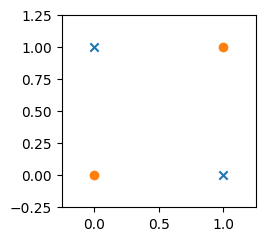

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 0


C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:23: RuntimeWarning: invalid value encountered in scalar divide
  slope = -model.coef_[0][0] / model.coef_[0][1]
C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:24: RuntimeWarning: invalid value encountered in scalar divide
  intercept = -model.intercept_[0] / model.coef_[0][1]


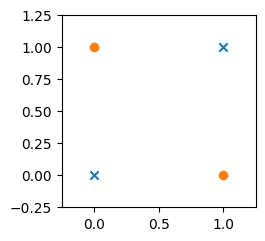

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 0


C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:23: RuntimeWarning: invalid value encountered in scalar divide
  slope = -model.coef_[0][0] / model.coef_[0][1]
C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:24: RuntimeWarning: invalid value encountered in scalar divide
  intercept = -model.intercept_[0] / model.coef_[0][1]


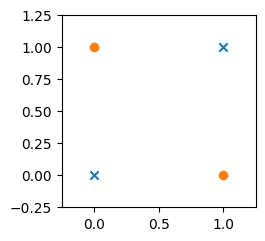

x=[0 0] -> predicted class = 0
x=[0 1] -> predicted class = 0
x=[1 0] -> predicted class = 0
x=[1 1] -> predicted class = 0


C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:23: RuntimeWarning: invalid value encountered in scalar divide
  slope = -model.coef_[0][0] / model.coef_[0][1]
C:\Users\falko\AppData\Local\Temp\ipykernel_39772\1524017042.py:24: RuntimeWarning: invalid value encountered in scalar divide
  intercept = -model.intercept_[0] / model.coef_[0][1]


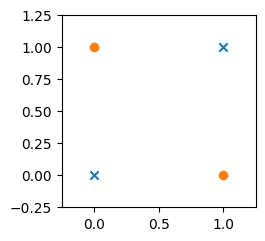

In [5]:
plot_example(lambda x, y: int(x ^ y))
plot_example(lambda x, y: int(x ^ (not y)))
plot_example(lambda x, y: int(not (x ^ y)))
plot_example(lambda x, y: int((not x) ^ y))